# 03 - Distributions in Seaborn

## Goal
Build intuition for **distributions** using Seaborn: histograms, KDE, rug plots, bivariate distributions, and ECDF.

## Quick cheat sheet
| Plot | Function | Best for | Key params |
|---|---|---|---|
| Histogram | `sns.histplot()` | Counts / density by bins | `bins`, `binwidth`, `stat`, `common_norm` |
| KDE | `sns.kdeplot()` | Smooth density estimate | `fill`, `bw_adjust`, `cut` |
| Rug | `sns.rugplot()` | Show exact sample locations | `height`, `alpha` |
| Bivariate dist | `sns.histplot(x=..., y=...)` / `sns.kdeplot(x=..., y=...)` | Joint distribution | `bins`, `cmap`, `levels`, `fill` |
| ECDF | `sns.ecdfplot()` | CDF view (robust + interpretable) | `complementary`, `stat` |

## Quick intuition
- **Histogram**: depends on binning; great for a first look.
- **KDE**: smooth curve; bandwidth controls smoothness.
- **ECDF**: no bins, no bandwidth; shows exact empirical distribution.


In [1]:
# Setup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="notebook")

# Built-in seaborn datasets
penguins = sns.load_dataset('penguins')
tips = sns.load_dataset('tips')

# Clean a few columns (remove NaNs for numeric plotting)
penguins_clean = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species'])

print('penguins:', penguins.shape)
print('penguins_clean:', penguins_clean.shape)


penguins: (344, 7)
penguins_clean: (342, 7)


## 1) Univariate histograms (`histplot`)
A histogram groups continuous values into **bins** and shows how many samples fall into each bin.

### Binning strategies
- `bins=int`: choose number of bins (simple, but may hide structure).
- `binwidth=float`: specify bin width directly (more interpretable when units matter).
- `bins='auto'` / `'fd'` / `'sturges'` / `'doane'` / `'scott'` / `'rice'`: automatic rules (NumPy style).

### Normalization (`stat`)
- `stat='count'` (default): bar height = counts.
- `stat='density'`: integrates to 1 (good for comparing distributions).
- `stat='probability'`: bar heights sum to 1.
- `stat='percent'`: like probability, but *100.

Tip: If you plot multiple groups with `hue=...`, check `common_norm`.


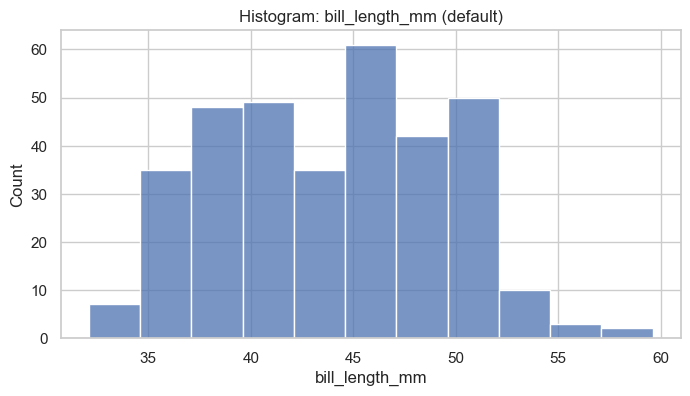

In [2]:
# Basic histogram
plt.figure(figsize=(8, 4))
sns.histplot(data=penguins_clean, x='bill_length_mm')
plt.title('Histogram: bill_length_mm (default)')
plt.show()


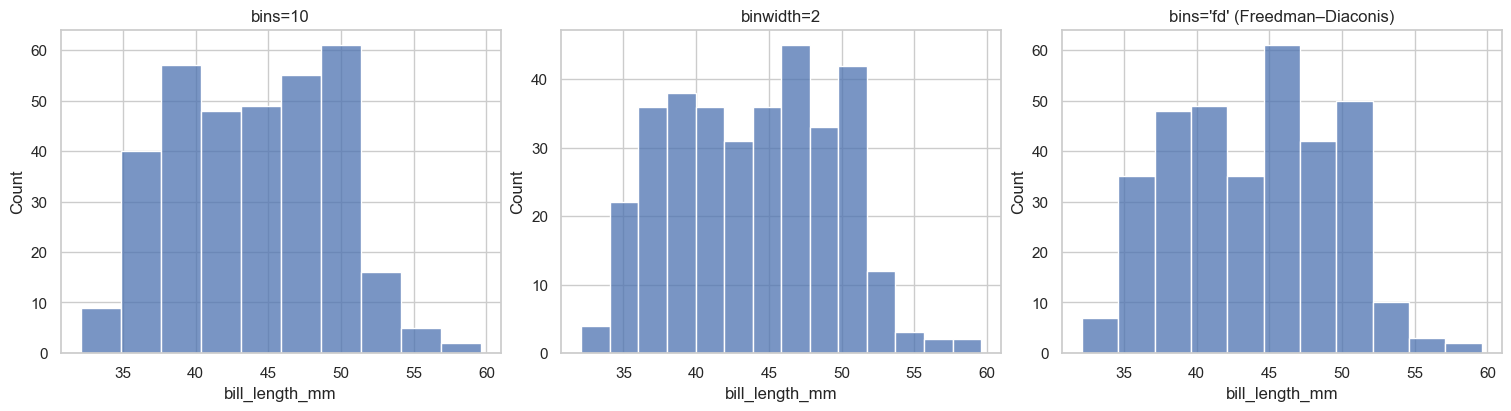

In [3]:
# Compare binning: bins vs binwidth vs automatic rule
fig, axes = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)

sns.histplot(data=penguins_clean, x='bill_length_mm', bins=10, ax=axes[0])
axes[0].set_title('bins=10')

sns.histplot(data=penguins_clean, x='bill_length_mm', binwidth=2, ax=axes[1])
axes[1].set_title('binwidth=2')

sns.histplot(data=penguins_clean, x='bill_length_mm', bins='fd', ax=axes[2])
axes[2].set_title("bins='fd' (Freedman–Diaconis)")

plt.show()


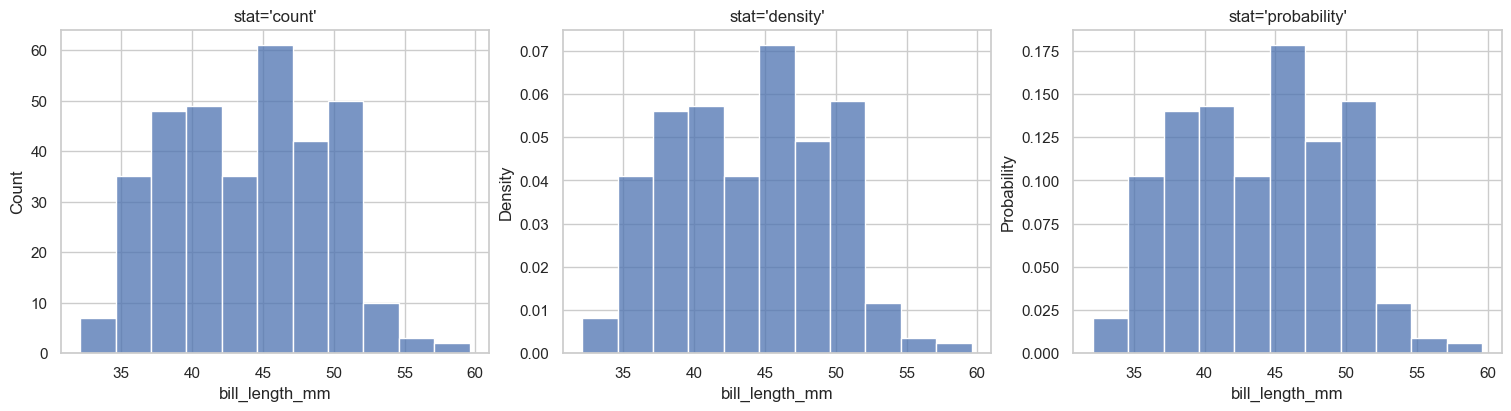

In [4]:
# Normalization comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)

sns.histplot(data=penguins_clean, x='bill_length_mm', stat='count', ax=axes[0])
axes[0].set_title("stat='count'")

sns.histplot(data=penguins_clean, x='bill_length_mm', stat='density', ax=axes[1])
axes[1].set_title("stat='density'")

sns.histplot(data=penguins_clean, x='bill_length_mm', stat='probability', ax=axes[2])
axes[2].set_title("stat='probability'")

plt.show()


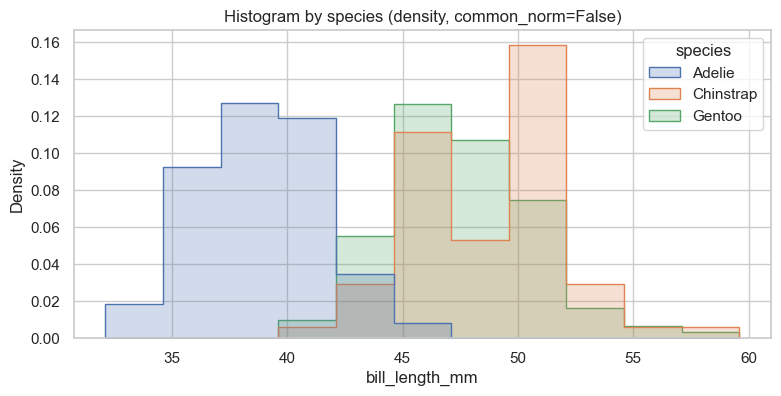

In [5]:
# Histograms with groups
plt.figure(figsize=(9, 4))
sns.histplot(
    data=penguins_clean,
    x='bill_length_mm',
    hue='species',
    bins='fd',
    stat='density',
    common_norm=False,  # IMPORTANT when comparing group densities
    element='step'
)
plt.title("Histogram by species (density, common_norm=False)")
plt.show()


## 2) Kernel Density Estimation (`kdeplot`)
KDE estimates a smooth probability density function from data.

### Key parameters
- `fill=True`: shade under the curve.
- `bw_adjust`: bandwidth multiplier.
  - `bw_adjust < 1` → more wiggly (less smoothing)
  - `bw_adjust > 1` → smoother
- `cut`: how far beyond data limits the curve extends (default extends; set `cut=0` to stop at min/max).

Rule of thumb: start with default bandwidth, then try `bw_adjust=0.6` and `bw_adjust=1.5` to see sensitivity.


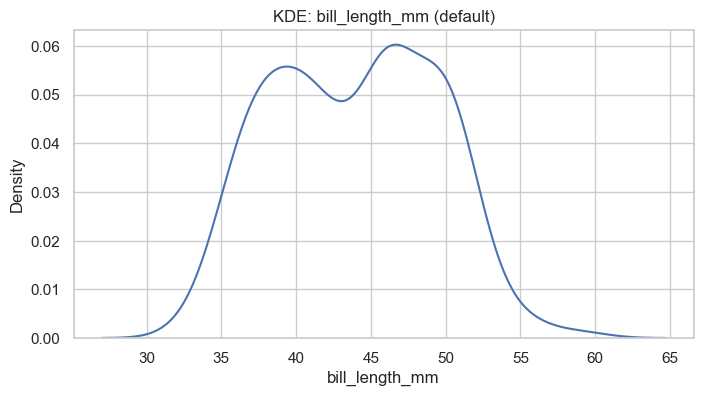

In [6]:
# Basic KDE
plt.figure(figsize=(8, 4))
sns.kdeplot(data=penguins_clean, x='bill_length_mm')
plt.title('KDE: bill_length_mm (default)')
plt.show()


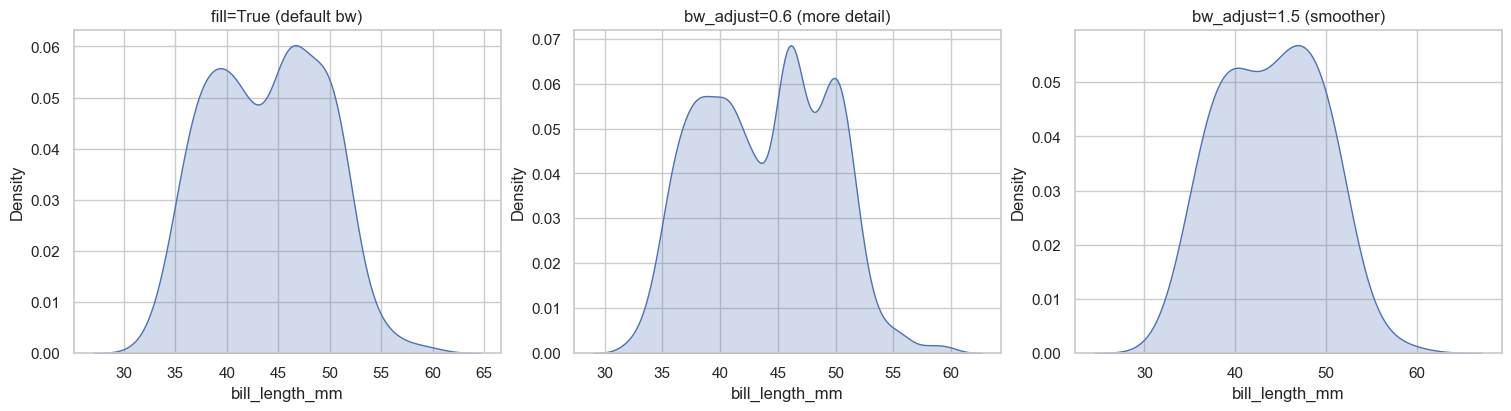

In [7]:
# KDE with shading and bandwidth adjustment
fig, axes = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)

sns.kdeplot(data=penguins_clean, x='bill_length_mm', fill=True, ax=axes[0])
axes[0].set_title('fill=True (default bw)')

sns.kdeplot(data=penguins_clean, x='bill_length_mm', fill=True, bw_adjust=0.6, ax=axes[1])
axes[1].set_title('bw_adjust=0.6 (more detail)')

sns.kdeplot(data=penguins_clean, x='bill_length_mm', fill=True, bw_adjust=1.5, ax=axes[2])
axes[2].set_title('bw_adjust=1.5 (smoother)')

plt.show()


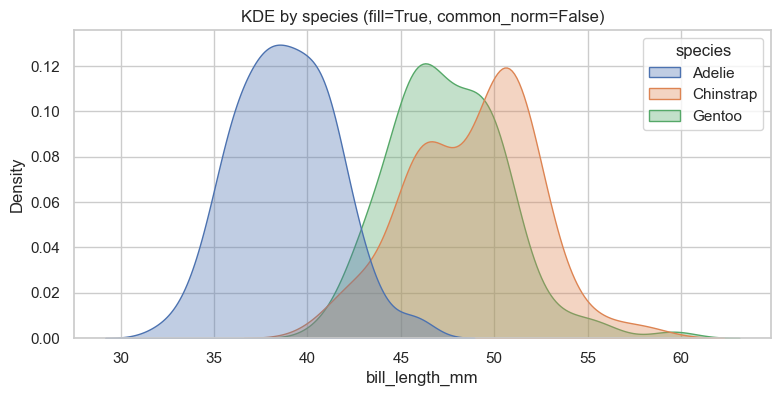

In [8]:
# KDE by group
plt.figure(figsize=(9, 4))
sns.kdeplot(
    data=penguins_clean,
    x='bill_length_mm',
    hue='species',
    fill=True,
    common_norm=False,
    alpha=0.35
)
plt.title('KDE by species (fill=True, common_norm=False)')
plt.show()


## 3) Rug plots (`rugplot`)
A rug plot adds small ticks for each observation, showing the **exact sample locations**.

Use it to reveal:
- clustering
- outliers
- gaps in the data

Tip: Rug plots can get cluttered for large datasets; use `alpha` and smaller `height`.


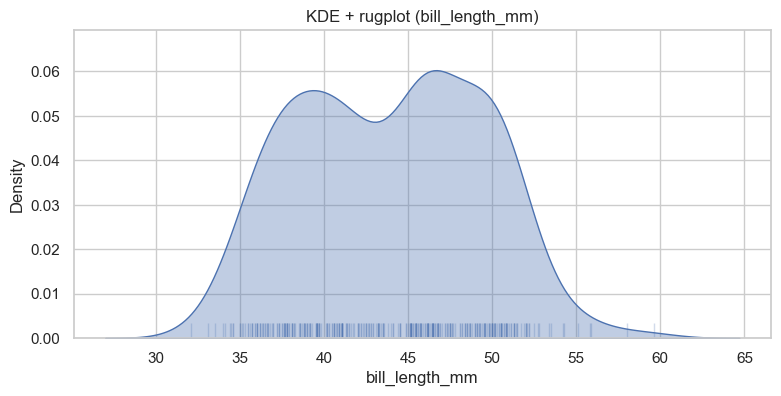

In [9]:
# KDE + Rug overlay
plt.figure(figsize=(9, 4))

sns.kdeplot(data=penguins_clean, x='bill_length_mm', fill=True, bw_adjust=1.0, alpha=0.35)
sns.rugplot(data=penguins_clean, x='bill_length_mm', height=0.05, alpha=0.25)

plt.title('KDE + rugplot (bill_length_mm)')
plt.show()


## 4) Bivariate distributions (x + y)
Bivariate distributions show how two variables behave together.

### Common options
- **Joint histogram**: `sns.histplot(x=..., y=...)`
- **2D KDE**: `sns.kdeplot(x=..., y=...)`

Interpretation tips:
- Joint histogram emphasizes **counts/density in bins**.
- 2D KDE emphasizes **smooth density contours**.


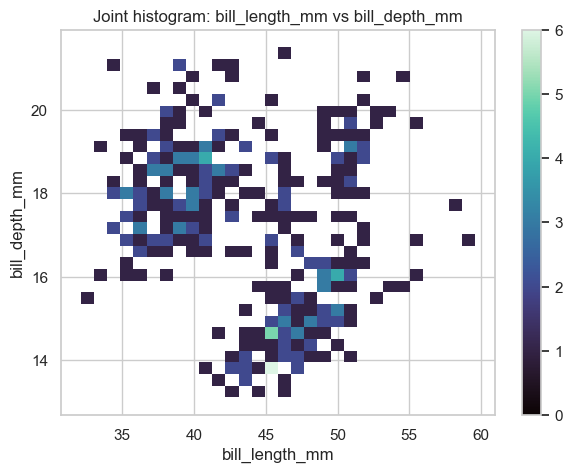

In [10]:
# Joint histogram (2D) with a colormap
plt.figure(figsize=(7, 5))
sns.histplot(
    data=penguins_clean,
    x='bill_length_mm',
    y='bill_depth_mm',
    bins=30,
    cbar=True,
    cmap='mako'
)
plt.title('Joint histogram: bill_length_mm vs bill_depth_mm')
plt.show()


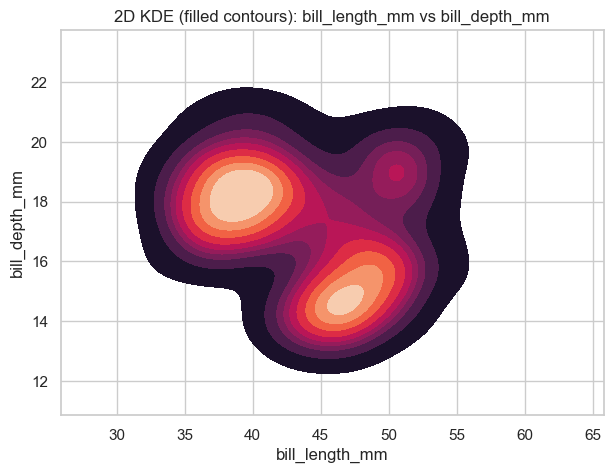

In [11]:
# 2D KDE: filled contours
plt.figure(figsize=(7, 5))
sns.kdeplot(
    data=penguins_clean,
    x='bill_length_mm',
    y='bill_depth_mm',
    fill=True,
    levels=10,
    thresh=0.05,
    cmap='rocket'
)
plt.title('2D KDE (filled contours): bill_length_mm vs bill_depth_mm')
plt.show()


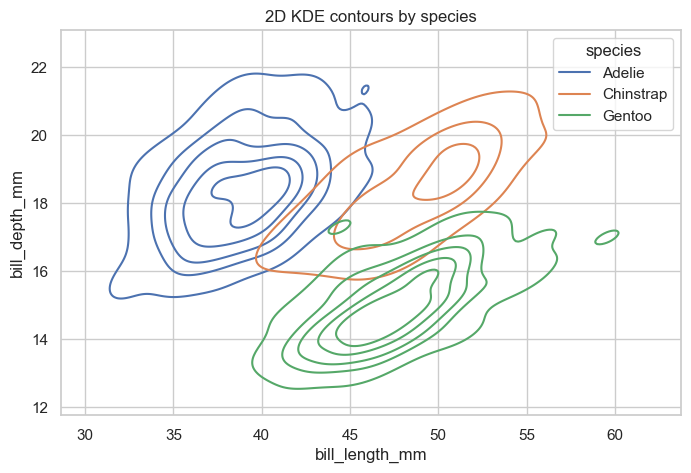

In [12]:
# 2D KDE by group (contours)
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=penguins_clean,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    levels=6,
    fill=False
)
plt.title('2D KDE contours by species')
plt.show()


## 5) ECDF (`ecdfplot`)
ECDF = Empirical Cumulative Distribution Function.

### Why ECDF is great
- No bins (unlike histograms)
- No bandwidth choice (unlike KDE)
- Easy to answer probability questions like: “What fraction of observations are ≤ x?”

### Key options
- `complementary=True`: plots 1 - ECDF (survival function).
- `stat='proportion'` (default) or `stat='count'`.


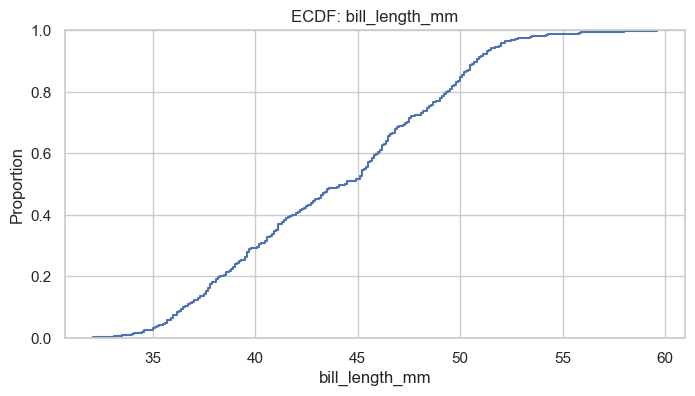

In [13]:
# ECDF basic
plt.figure(figsize=(8, 4))
sns.ecdfplot(data=penguins_clean, x='bill_length_mm')
plt.title('ECDF: bill_length_mm')
plt.show()


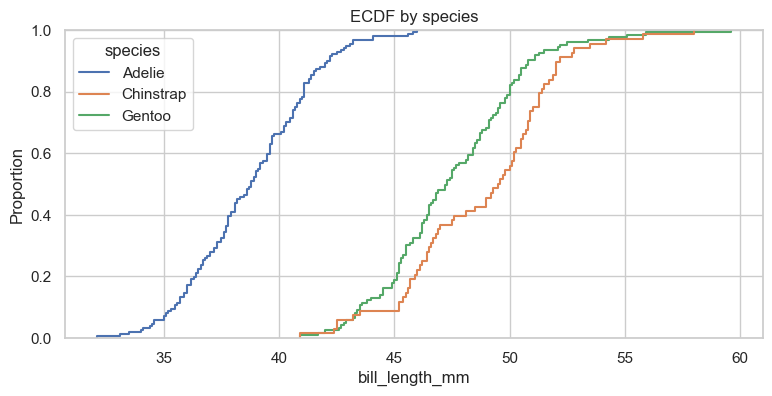

In [14]:
# ECDF by group
plt.figure(figsize=(9, 4))
sns.ecdfplot(data=penguins_clean, x='bill_length_mm', hue='species')
plt.title('ECDF by species')
plt.show()


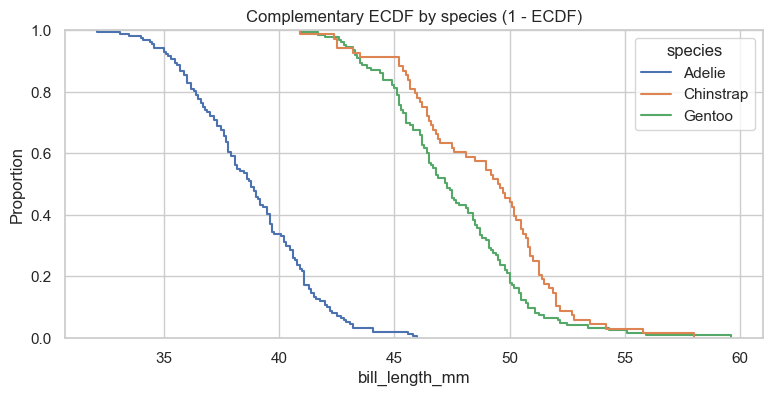

In [15]:
# Complementary ECDF (survival function)
plt.figure(figsize=(9, 4))
sns.ecdfplot(data=penguins_clean, x='bill_length_mm', hue='species', complementary=True)
plt.title('Complementary ECDF by species (1 - ECDF)')
plt.show()


---
## Practice set
Use `penguins_clean`.

### A) Histograms
1. Plot a histogram of `body_mass_g` with `bins=20` and `stat='count'`.
2. Re-plot with `stat='density'` and `common_norm=False` with `hue='species'`.
3. Try `binwidth=200` and compare the interpretation vs `bins=20`.

### B) KDE
4. Plot KDE of `body_mass_g` with `bw_adjust=0.7` and `bw_adjust=1.6` on two subplots.
5. Add `cut=0` and see the difference.

### C) Rug plot
6. Overlay a rug plot on the KDE of `body_mass_g` (tune `height` and `alpha`).

### D) Bivariate
7. Create a joint histogram of `bill_length_mm` vs `flipper_length_mm` with `bins=40`.
8. Create a 2D KDE for the same, with filled contours (`fill=True`) and `levels=8`.

### E) ECDF
9. Plot ECDF of `body_mass_g` for each `species`.
10. Plot complementary ECDF for `body_mass_g` for each `species`.

### Challenge
11. Write a helper function `compare_hist_kde(x_col, hue_col=None)` that creates a 1x2 figure: histogram (density) + KDE (fill).


In [16]:
# Practice solutions template (fill TODOs)

# A) Histograms
# TODO 1-3

# B) KDE
# TODO 4-5

# C) Rug plot
# TODO 6

# D) Bivariate
# TODO 7-8

# E) ECDF
# TODO 9-10

# Challenge
from typing import Optional

def compare_hist_kde(x_col: str, hue_col: Optional[str] = None):
    # TODO: build a 1x2 figure
    # - Left: histplot(stat='density', common_norm=False if hue used)
    # - Right: kdeplot(fill=True, common_norm=False if hue used)
    pass


## Reference links
- Seaborn distributions tutorial: https://seaborn.pydata.org/tutorial/distributions.html
- `histplot` API: https://seaborn.pydata.org/generated/seaborn.histplot.html
- `kdeplot` API: https://seaborn.pydata.org/generated/seaborn.kdeplot.html
- `ecdfplot` API: https://seaborn.pydata.org/generated/seaborn.ecdfplot.html
